In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [12]:
df=pd.read_csv("D:\Data Science\Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
df.rename(columns={"Annual Income (k$)":"Income",
                  "Spending Score (1-100)":"Score"},inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Genre       200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Score       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
df.isnull().sum()

CustomerID    0
Genre         0
Age           0
Income        0
Score         0
dtype: int64

In [17]:
df.drop(columns=["CustomerID","Genre","Age"],inplace=True)

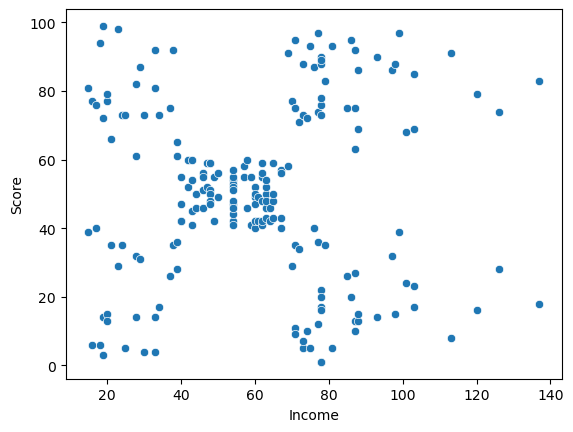

In [19]:
sns.scatterplot(x="Income",y="Score",data=df)
plt.show()

# for unsupervised machine learning there is no output variable

In [20]:
x=df

# 1.KMeans Clustering
find the optimal number of clusters:Elbow Curve

In [22]:
wcss=[]

for k in range(1,11):
    from sklearn.cluster import KMeans
    kmeans=KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
print(wcss)

[269981.28, 181363.59595959596, 106348.37306211119, 73679.78903948834, 44448.45544793371, 37239.835542456036, 30273.394312070042, 25009.79892943139, 22143.222100767453, 19753.308236183544]


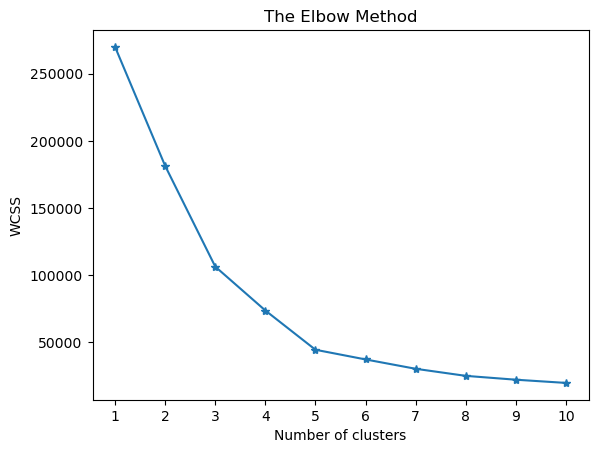

In [23]:
#Using the elbow methos
plt.plot(range(1,11),wcss,marker="*")
plt.xticks(range(1,11))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5, init='k-means++',random_state=True)

#fit & predict
x["km_cluster"]=kmeans.fit_predict(x)

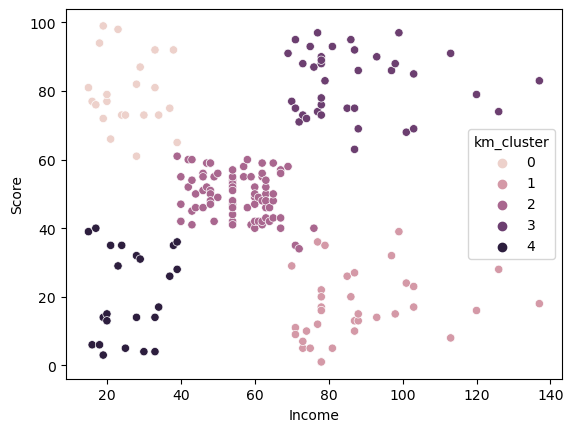

In [25]:
sns.scatterplot(x="Income",y="Score",hue="km_cluster",data=x)
plt.show()

# 2.Hierarchical Clustering
identify the optimal number of cluster using Dendrogram

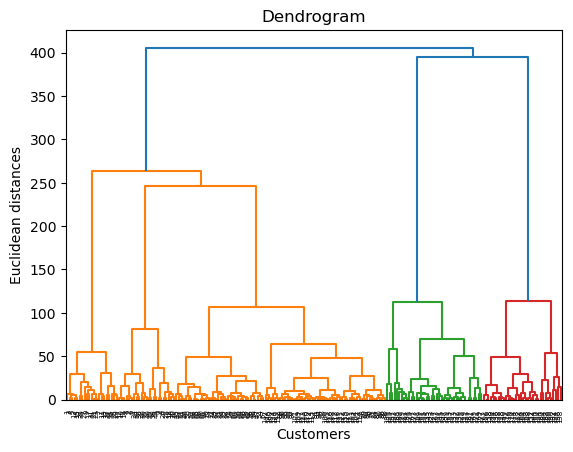

In [30]:
import scipy.cluster.hierarchy as sch

data=sch.linkage(x,method='ward')

dendrogram=sch.dendrogram(data)

plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

### Hierarchical Clustering Model

In [32]:
from sklearn.cluster import AgglomerativeClustering

hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean', linkage='ward')

#fit&Predict
x["h_cluster"]=hc.fit_predict(x)

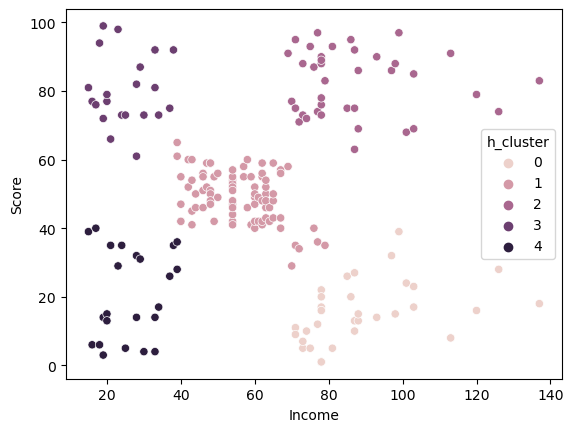

In [33]:
sns.scatterplot(x="Income",y="Score",hue="h_cluster",data=x)
plt.show()

## 3.DBSCAN Clustering

In [40]:
for r in range(1,10):
    for m in range(3,10):
        from sklearn.cluster import DBSCAN
        dbs=DBSCAN(eps=r, min_samples=m)
        x["db_cluster"]=dbs.fit_predict(x)
    
    if x["db_cluster"].nunique()==5:
        break
        
print("eps:",r)
print("min:",m)

eps: 8
min: 9


In [41]:
from sklearn.cluster import DBSCAN

dbs=DBSCAN(eps=8,min_samples=9)

x["db_cluster"]=dbs.fit_predict(x)




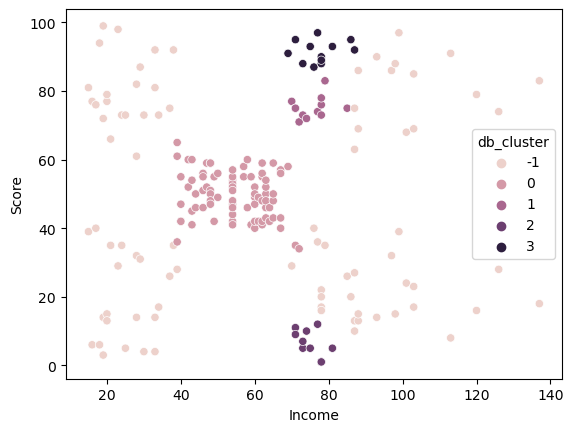

In [42]:
sns.scatterplot(x="Income",y="Score",hue="db_cluster",data=x)
plt.show()